In [8]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm import tqdm
import requests
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
# If you've uploaded the file to Colab's file system
path= '/content/student_depression_dataset.csv'
df = pd.read_csv(path)

In [17]:
# Show first 5 rows (default)
df.head()

# Show first 10 rows
df.head(10)

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   
5  33    Male  29.0           Pune    Student                2.0   
6  52    Male  30.0          Thane    Student                3.0   
7  56  Female  30.0        Chennai    Student                2.0   
8  59    Male  28.0         Nagpur    Student                3.0   
9  62    Male  31.0         Nashik    Student                2.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   
5            0.0  5.70                 3.0               0.0   
6            0.0  9.54                 4.0               0.0   
7            0.0  8.04                 4.0               0.0   
8            0.0  9.79                 1.0               0.0   
9            0.0  8.38                 3.0               0.0   

        Sleep Duration Dietary Habits      Degree  \
0          '5-6 hours'        Healthy     B.Pharm   
1          '5-6 hours'       Moderate         BSc   
2  'Less than 5 hours'        Healthy          BA   
3          '7-8 hours'       Moderate         BCA   
4          '5-6 hours'       Moderate      M.Tech   
5  'Less than 5 hours'        Healthy         PhD   
6          '7-8 hours'        Healthy         BSc   
7  'Less than 5 hours'      Unhealthy  'Class 12'   
8          '7-8 hours'       Moderate        B.Ed   
9  'Less than 5 hours'       Moderate         LLB   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                   Yes               3.0              1.0   
1                                    No               3.0              2.0   
2                                    No               9.0              1.0   
3                                   Yes               4.0              5.0   
4                                   Yes               1.0              1.0   
5                                    No               4.0              1.0   
6                                    No               1.0              2.0   
7                                    No               0.0              1.0   
8                                   Yes              12.0              3.0   
9                                   Yes               2.0              5.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0  
5                               No           0  
6                               No           0  
7                              Yes           0  
8                               No           1  
9                               No           1

In [18]:
# Get concise summary of the DataFrame
df.info()

# Show basic statistics for numerical columns
df.describe()

# For categorical columns
df.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Gender    City Profession       Sleep Duration Dietary Habits  \
count   27901   27901      27901                27901          27901   
unique      2      52         14                    5              4   
top      Male  Kalyan    Student  'Less than 5 hours'      Unhealthy   
freq    15547    1570      27870                 8310          10317   

            Degree Have you ever had suicidal thoughts ? Financial Stress  \
count        27901                                 27901            27901   
unique          28                                     2                6   
top     'Class 12'                                   Yes              5.0   
freq          6080                                 17656             6715   

       Family History of Mental Illness  
count                             27901  
unique                                2  
top                                  No  
freq                              14398

In [28]:
# Select only the required columns
columns_of_interest = [
    "id",
    "Gender",
    "Age",
    "Depression",
    "Academic Pressure",
    "CGPA",
    "Sleep Duration"
]
cleaned_data = df[columns_of_interest]

# Drop rows with missing values
cleaned_data.dropna(inplace=True)

# Rename columns for easier reference (optional - only if you want to change names)
cleaned_data.columns = [
    "ID",
    "Gender",
    "Age",
    "Depression_Status",
    "Academic_Pressure",
    "CGPA",
    "Sleep_Duration"
]

# Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(cleaned_data)

/tmp/ipython-input-28-3664134931.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(inplace=True)


           ID  Gender   Age  Depression_Status  Academic_Pressure     CGPA  \
0           2    Male  33.0                  1                5.0   8.9700   
1           8  Female  24.0                  0                2.0   5.9000   
2          26    Male  31.0                  0                3.0   7.0300   
3          30  Female  28.0                  1                3.0   5.5900   
4          32  Female  25.0                  0                4.0   8.1300   
5          33    Male  29.0                  0                2.0   5.7000   
6          52    Male  30.0                  0                3.0   9.5400   
7          56  Female  30.0                  0                2.0   8.0400   
8          59    Male  28.0                  1                3.0   9.7900   
9          62    Male  31.0                  1                2.0   8.3800   
10         83    Male  24.0                  1                3.0   6.1000   
11         91    Male  33.0                  0                3.

In [29]:
# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

Dataset shape: (27901, 18)

First 5 rows:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 

In [30]:
# Data cleaning
# Convert categorical columns to appropriate types
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
                   'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [31]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import numpy as np

# Select features and target
features = ['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
            'Sleep Duration', 'Dietary Habits', 'Work/Study Hours', 'Financial Stress',
            'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
X = df[features]
y = df['Depression']

# Check class distribution
print("Class distribution in full dataset:")
print(y.value_counts())

# Encode categorical features
X = pd.get_dummies(X, columns=['Gender', 'Sleep Duration', 'Dietary Habits',
                               'Have you ever had suicidal thoughts ?',
                               'Family History of Mental Illness',
                               'Financial Stress'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution in test set
print("\nClass distribution in test set:")
print(y_test.value_counts())

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Handle probability prediction carefully
try:
    y_prob = model.predict_proba(X_test)
    if y_prob.shape[1] == 1:  # Only one class present
        y_prob = y_prob[:, 0]  # Use the only available probabilities
    else:
        y_prob = y_prob[:, 1]  # Use probabilities for positive class
except AttributeError:
    y_prob = y_pred  # Fallback to predictions if predict_proba not available

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate MAE and RMSE only if we have proper probabilities
if len(np.unique(y_prob)) > 1:  # Only calculate if we have meaningful probabilities
    mae = mean_absolute_error(y_test, y_prob)
    rmse = np.sqrt(mean_squared_error(y_test, y_prob))
    print("\nAdditional Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
else:
    print("\nCannot calculate MAE and RMSE - insufficient class distribution")

# If you want to analyze by city (assuming you have a 'City' column)
if 'City' in df.columns:
    results = {}
    cities = df['City'].unique()

    for city in cities:
        city_data = df[df['City'] == city]
        if len(city_data) < 2:  # Skip cities with insufficient data
            continue

        X_city = city_data[features]
        y_city = city_data['Depression']

        # Encode categorical features
        X_city = pd.get_dummies(X_city, columns=['Gender', 'Sleep Duration', 'Dietary Habits',
                                       'Have you ever had suicidal thoughts ?',
                                       'Family History of Mental Illness',
                                       'Financial Stress'])

        # Skip if test set would be empty
        if len(np.unique(y_city)) < 2:
            continue

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.3, random_state=42)

        # Check if test set has multiple classes
        if len(np.unique(y_test)) < 2:
            continue

        # Train model
        model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        model.fit(X_train, y_train)

        # Evaluate
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            if y_prob.shape[1] == 1:
                y_prob = y_prob[:, 0]
            else:
                y_prob = y_prob[:, 1]
        except AttributeError:
            y_prob = y_pred

        clf_report = classification_report(y_test, y_pred, output_dict=True)

        # Only store metrics if we have both classes
        if len(np.unique(y_test)) > 1 and len(np.unique(y_pred)) > 1:
            try:
                mae = mean_absolute_error(y_test, y_prob)
                rmse = np.sqrt(mean_squared_error(y_test, y_prob))

                results[city] = {
                    'Samples': len(city_data),
                    'Accuracy': clf_report['accuracy'],
                    'Precision': clf_report['1']['precision'],
                    'Recall': clf_report['1']['recall'],
                    'F1 Score': clf_report['1']['f1-score'],
                    'MAE': mae,
                    'RMSE': rmse,
                    'Predictions': y_pred,
                    'Actuals': y_test.values,
                    'Probabilities': y_prob
                }

                print(f"\nResults for {city} (n={len(city_data)}):")
                print(f"Accuracy: {clf_report['accuracy']:.4f}")
                if '1' in clf_report:  # Check if positive class exists in report
                    print(f"Precision: {clf_report['1']['precision']:.4f}")
                    print(f"Recall: {clf_report['1']['recall']:.4f}")
                    print(f"F1 Score: {clf_report['1']['f1-score']:.4f}")
                print(f"Mean Absolute Error (MAE): {mae:.4f}")
                print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
                print("Confusion Matrix:")
                print(confusion_matrix(y_test, y_pred))
                print("-" * 50)
            except KeyError:
                continue

    # Convert results to DataFrame if cities were analyzed
    if results:
        metrics_df = pd.DataFrame.from_dict(results, orient='index')
        metrics_df = metrics_df[['Samples', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MAE', 'RMSE']]
        print("\nSummary of Results Across Cities:")
        print(metrics_df.sort_values('Samples', ascending=False))

Class distribution in full dataset:
Depression
1    16336
0    11565
Name: count, dtype: int64

Class distribution in test set:
Depression
1    4866
0    3505
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3505
           1       0.85      0.87      0.86      4866

    accuracy                           0.83      8371
   macro avg       0.83      0.83      0.83      8371
weighted avg       0.83      0.83      0.83      8371


Confusion Matrix:
[[2749  756]
 [ 652 4214]]

Additional Metrics:
Mean Absolute Error (MAE): 0.2413
Root Mean Squared Error (RMSE): 0.3464

Results for Visakhapatnam (n=969):
Accuracy: 0.8213
Precision: 0.8476
Recall: 0.8373
F1 Score: 0.8424
Mean Absolute Error (MAE): 0.2829
Root Mean Squared Error (RMSE): 0.3630
Confusion Matrix:
[[100  25]
 [ 27 139]]
--------------------------------------------------

Results for Bangalore (n=767):
Accuracy: 0.8095
Precisi

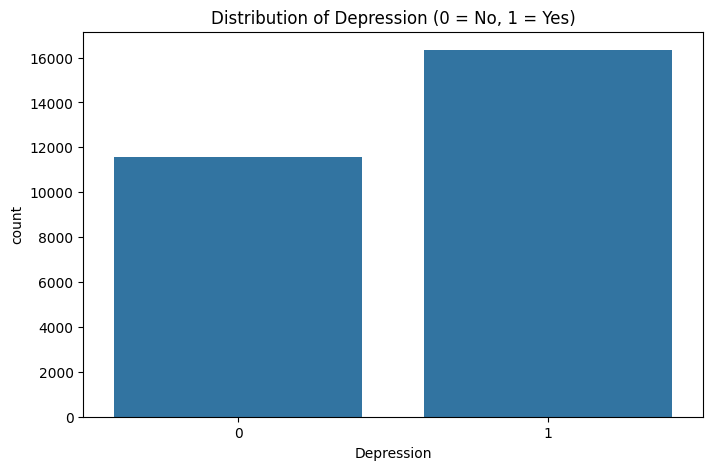

In [ ]:
# Exploratory Data Analysis (EDA)
# Depression distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (0 = No, 1 = Yes)')
plt.show()


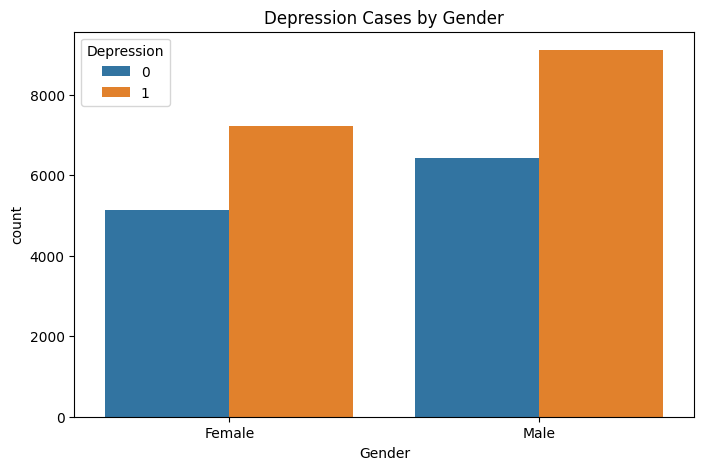

In [ ]:
# Depression by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depression Cases by Gender')
plt.show()

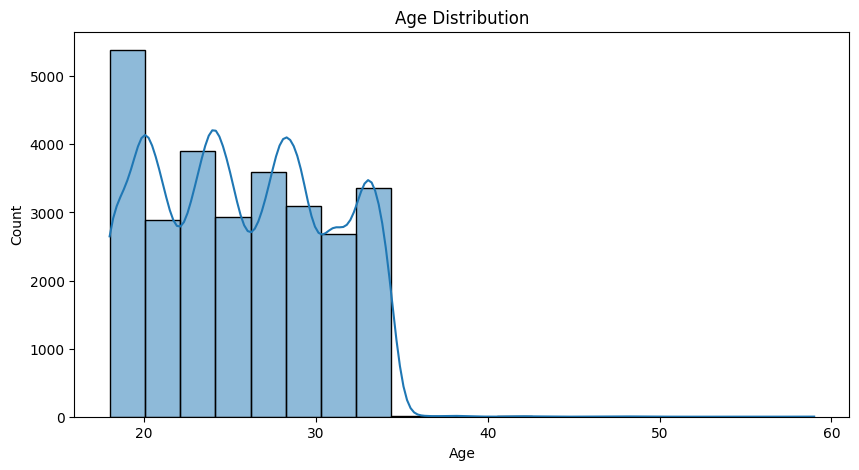

In [ ]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

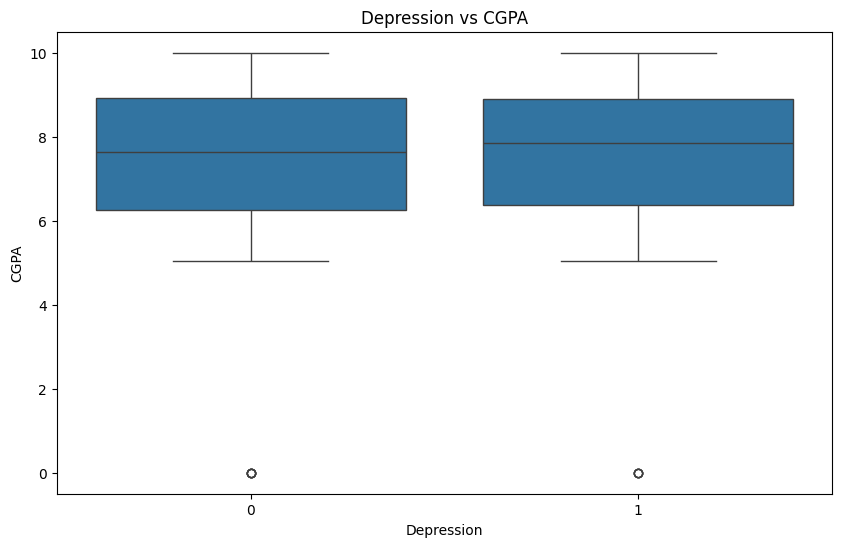

In [ ]:
# Depression vs CGPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title('Depression vs CGPA')
plt.show()

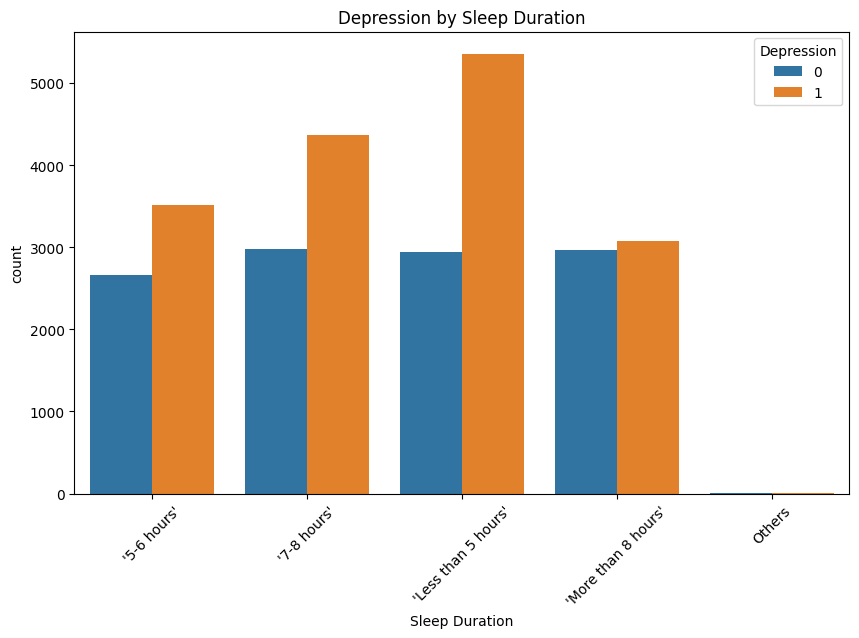

In [ ]:
# Depression vs Sleep Duration
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Duration', hue='Depression', data=df)
plt.title('Depression by Sleep Duration')
plt.xticks(rotation=45)
plt.show()

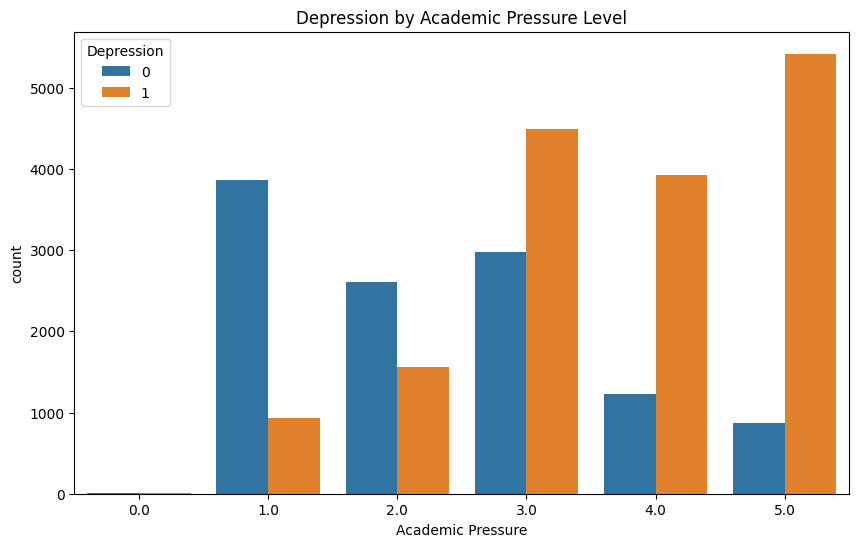

In [ ]:
# Depression vs Academic Pressure
plt.figure(figsize=(10, 6))
sns.countplot(x='Academic Pressure', hue='Depression', data=df)
plt.title('Depression by Academic Pressure Level')
plt.show()


In [ ]:
# Select features and target
features = ['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
            'Sleep Duration', 'Dietary Habits', 'Work/Study Hours', 'Financial Stress',
            'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
X = df[features]
y = df['Depression']

# Encode categorical features
X = pd.get_dummies(X, columns=['Gender', 'Sleep Duration', 'Dietary Habits',
                               'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import numpy as np

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Using probabilities to calculate MAE and RMSE (treating as regression)
mae = mean_absolute_error(y_test, y_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_prob))

# Print the evaluation metrics
print("\nAdditional Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# If you want to analyze by city (assuming you have a 'City' column)
# You'll need to modify this part as your original code references undefined variables
if 'City' in df.columns:
    results = {}
    cities = df['City'].unique()

    for city in cities:
        city_data = df[df['City'] == city]
        X_city = city_data[features]
        y_city = city_data['Depression']

        # Encode categorical features
        X_city = pd.get_dummies(X_city, columns=['Gender', 'Sleep Duration', 'Dietary Habits',
                                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress'])

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.3, random_state=42)

        # Train model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        clf_report = classification_report(y_test, y_pred, output_dict=True)
        mae = mean_absolute_error(y_test, y_prob)
        rmse = np.sqrt(mean_squared_error(y_test, y_prob))

        # Store results
        results[city] = {
            'Samples': len(city_data),
            'Accuracy': clf_report['accuracy'],
            'Precision': clf_report['1']['precision'],
            'Recall': clf_report['1']['recall'],
            'F1 Score': clf_report['1']['f1-score'],
            'MAE': mae,
            'RMSE': rmse,
            'Predictions': y_pred,
            'Actuals': y_test.values,
            'Probabilities': y_prob
        }

        # Print metrics
        print(f"\nResults for {city} (n={len(city_data)}):")
        print(f"Accuracy: {clf_report['accuracy']:.4f}")
        print(f"Precision: {clf_report['1']['precision']:.4f}")
        print(f"Recall: {clf_report['1']['recall']:.4f}")
        print(f"F1 Score: {clf_report['1']['f1-score']:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 50)

    # Convert results to DataFrame if cities were analyzed
    metrics_df = pd.DataFrame.from_dict(results, orient='index')
    metrics_df = metrics_df[['Samples', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MAE', 'RMSE']]
    print("\nSummary of Results Across Cities:")
    print(metrics_df.sort_values('Samples', ascending=False))


NameError: name 'df' is not defined

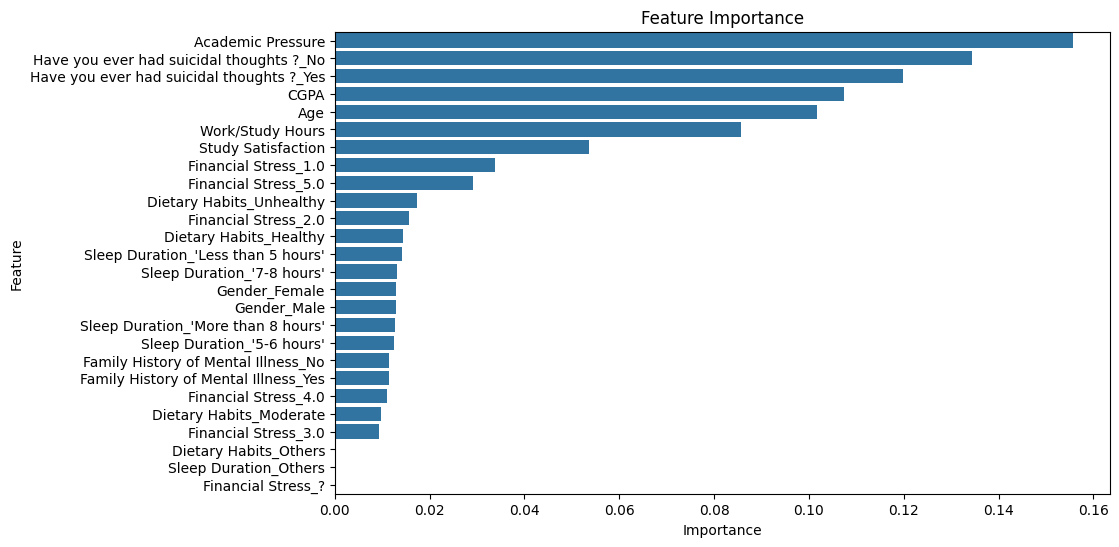

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

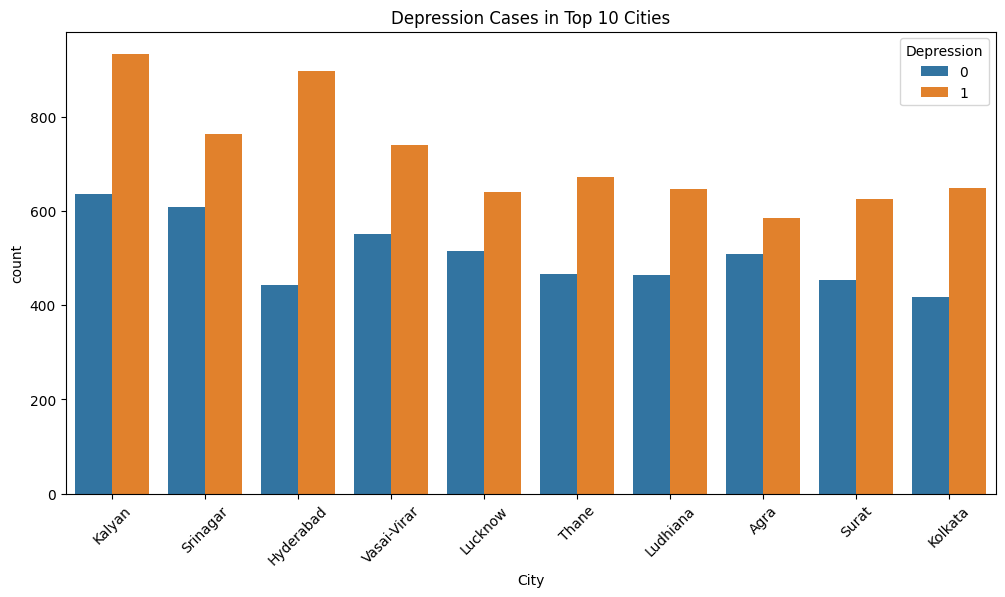

In [ ]:
# Additional analysis: Depression rates by city (top 10 cities)
top_cities = df['City'].value_counts().head(10).index
df_top_cities = df[df['City'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Depression', data=df_top_cities, order=top_cities)
plt.title('Depression Cases in Top 10 Cities')
plt.xticks(rotation=45)
plt.show()


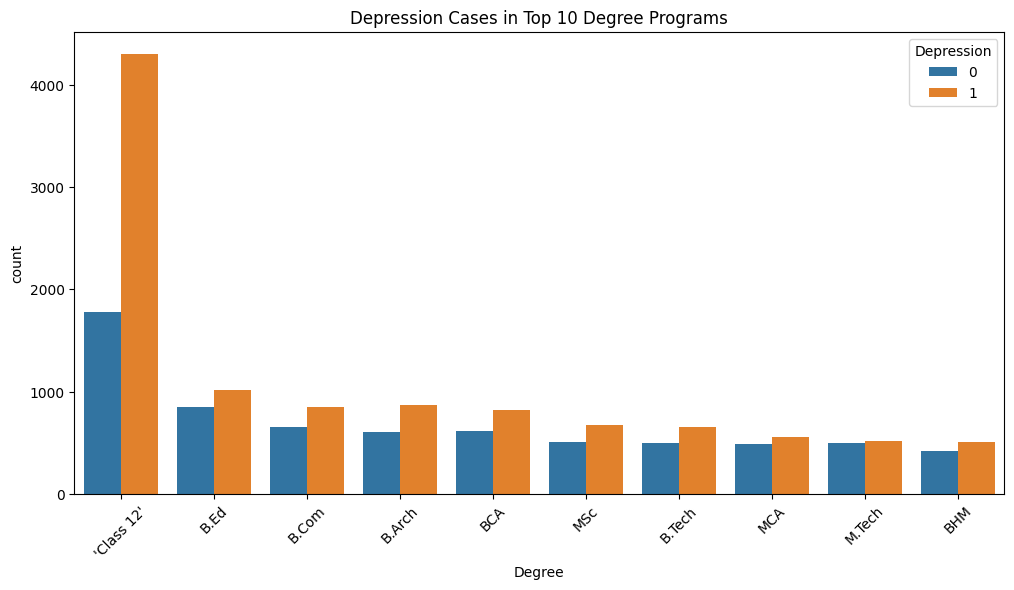

In [ ]:
# Depression vs Degree (top 10 degrees)
top_degrees = df['Degree'].value_counts().head(10).index
df_top_degrees = df[df['Degree'].isin(top_degrees)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Degree', hue='Depression', data=df_top_degrees, order=top_degrees)
plt.title('Depression Cases in Top 10 Degree Programs')
plt.xticks(rotation=45)
plt.show()